# Bio Embeddings for Shallow Learners
1) Choose a VOG
2) Choose and generate Bio Embedding: SeqVec, ProtTrans 
    - Input: VOG specific .fasta file
    - Store sequences as objects in a list
    - Create embedder object and then an amino-acid level- and a protein- level embedding
    - Output: Vector of sequences represented/embedded as points in a multidimensional (feature-) space (vector of vectors). The embeddings harbor a constant number of features, in contrast to the previous state, where protein sequences had different lengths. Amino acid - level embeddings can be considered not as points in this constant feature space but vectors with length equal the length of the sequence.

**Links:**
- SeqVec 
    - [Repository](https://github.com/Rostlab/SeqVec)
    - [Source-Code](https://github.com/Rostlab/SeqVec/blob/master/seqvec/seqvec.py)
- ProtTrans 
    - [Respository](https://github.com/agemagician/ProtTrans)
- Bio-Embeddings
    - [Repository](https://github.com/sacdallago/bio_embeddings/tree/develop)
    - [Notebooks](https://github.com/sacdallago/bio_embeddings/tree/develop/notebooks)
- [Embedder Benchmark Paper](https://www.mdpi.com/1422-0067/24/4/3775)
    

## 0) Setting up a conda environment
1) install anaconda
2) deactivate the base env
3) create and activate conda env
4) install python 3.8
5) pip install seqvec
6) pip install bio-embeddings[all]

## 1) Choose input fasta file

In [ ]:
# Test file for download (tiny_sampled.fasta)
# !wget http://data.bioembeddings.com/public/embeddings/notebooks/custom_data/tiny_sampled.fasta --output-document BE_testing/tiny_sampled.fasta

In [12]:
filepath = "fasta_files/tiny_sampled.fasta"
# filepath = "fasta_files/VOG00001.faa"
# filepath = "fasta_files/VOG00024.faa"

## 2) Generate Embeddings

### 2.1) Via SeqVec - Commandline (in progress)

In [ ]:
# !pip install seqvec
# !pip install seqvec==0.4.1

In [13]:
# Download SeqVec model (ELMo model trained on UniRef50) as zip folder
!wget https://rostlab.org/~deepppi/seqvec.zip --output-document seqvec.zip

--2024-02-14 17:51:59--  https://rostlab.org/~deepppi/seqvec.zip
Resolving rostlab.org (rostlab.org)... 188.114.97.10, 188.114.96.10, 2606:4700:3036::6815:2642, ...
Connecting to rostlab.org (rostlab.org)|188.114.97.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347361261 (331M) [application/zip]
Saving to: ‘seqvec.zip’

seqvec.zip          100%[===================>] 331.27M  18.9MB/s    in 18s     

2024-02-14 17:52:17 (18.6 MB/s) - ‘seqvec.zip’ saved [347361261/347361261]



In [14]:
# Unzip and store model files (seqvec.zip) in a folder called 'model' in your working directory (assuming you have unzip installed: $sudo apt-get install unzip)
!unzip seqvec.zip -d . # note: unexpectedly the result of this line is not the seqvec folder but it´s subfolder uniref50_v2
!mkdir -p SV_model # create folder called 'model'
!mv uniref50_v2/* SV_model/ # move weights and options file to 'model'
!rm -r uniref50_v2/ seqvec.zip # remove empty folders

Archive:  seqvec.zip
  inflating: ./uniref50_v2/weights.hdf5  
  inflating: ./uniref50_v2/options.json  


In [15]:
# Compute Embeddings 
# (--split-char: character for splitting the FASTA header in order to retrieve the protein identifier
#  --id: identifier symbol ">" at index 0)
!seqvec -i $filepath -o embeddings.npz --model SV_model/ --split-char ' ' --id 0


2024-02-14 17:52:54,616 Running on the CPU
2024-02-14 17:52:54,617 Total number of sequences: 12
2024-02-14 17:52:54,617 Loading the model
2024-02-14 17:52:54,617 Initializing ELMo.
  0%|                                                    | 0/12 [00:00<?, ?it/s]

<span style="color:red"> Error encounter: </span> <br>
    - json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0) <br>
    - The seqvec command has an optional parameter --model, for choosing a pretrained ELMo model (as 2 files: weights.hdf5 and options.json). <br>
    - If the parameter is not set, the command will download the files for the default model automatically. <br>
    - Apparently the .json file is empty (?). The options file also starts with an initial line, typcial for html files and not json files.<br>
    - <span style="color:blue"> Solved: </span>
    "Created a new conda environment with python 3.8, pip seqvec and pip bio-embeddings[all] (name: SP382), this time the run caused no problems (*rolling eyes*). But it still runs on CPU not GPU." <br>
    
<span style="color:red"> Error encounter: </span> <br>
Execution "finishes" after 12s without any computation.

In [ ]:
# Load Embeddings
import numpy as np
import json

# option 1: without identifiers:
aa_embd_SV = np.load("embeddings.npz")  # type: Dict[str, np.ndarray]

# # option 2: with identifiers as additional json file
# aa_embd_SV = np.load("embeddings.npy") # shape=(n_proteins,)
# with open("embeddings.json") as fp:
#     labels = json.load(fp)

<span style="color:red"> Error Encounter: </span>
-"No CUDA GPUs are available"
- <span style="color:blue"> Solved: </span> created new env (SP38) with python3.8, pip seqvec and pip bio-embeddings[all]

<span style='color:red'> Error Encounter: </span>
- sm_86 pytorch compatibility issue
- wrong pytorch version prevented using the GPU for the following embedding computation.
- <span style="color:blue"> Solved: </span> conda install pytorch==1.10.0 torchvision==0.11.0 torchaudio==0.10.0 cudatoolkit=11.3 -c pytorch -c conda-forge"

### 2.2) Via SeqVec - Script (in progress)

In [21]:
# Download SeqVec model (ELMo model trained on UniRef50) as zip folder
!wget https://rostlab.org/~deepppi/seqvec.zip --output-document seqvec.zip

--2024-02-10 13:48:40--  https://rostlab.org/~deepppi/seqvec.zip
Resolving rostlab.org (rostlab.org)... 188.114.96.10, 188.114.97.10, 2a06:98c1:3120::a, ...
Connecting to rostlab.org (rostlab.org)|188.114.96.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347361261 (331M) [application/zip]
Saving to: ‘seqvec.zip’

seqvec.zip          100%[===================>] 331.27M  1.80MB/s    in 3m 8s   

2024-02-10 13:51:48 (1.76 MB/s) - ‘seqvec.zip’ saved [347361261/347361261]



In [35]:
# Unzip and store model files in a folder called 'model' in your working directory (assuming you have unzip installed: $sudo apt-get install unzip)
!unzip seqvec.zip -d . # note: unexpectedly the result of this line is not the seqvec folder but it´s subfolder uniref50_v2
!mkdir -p SV_model # create folder called 'model'
!mv uniref50_v2/* SV_model/ # move weights and options file to 'model'
!rm -r uniref50_v2/ seqvec.zip # remove empty folders"

Archive:  seqvec.zip
  inflating: ./uniref50_v2/weights.hdf5  
  inflating: ./uniref50_v2/options.json  


In [4]:
# Load pretrained model
from allennlp.commands.elmo import ElmoEmbedder
from pathlib import Path

model_dir = Path('SV_model/')
weights = model_dir / 'weights.hdf5'
options = model_dir / 'options.json'
embedder = ElmoEmbedder(options,weights, cuda_device=-1) # cuda_device=-1 for CPU, 0 for GPU

<span style="color:red"> Error Encounter: </span>
- "No CUDA GPUs are available"
    
<span style='color:red'> Error Encounter: </span>
- sm_86 pytorch compatibility issue
- wrong pytorch version prevented using the GPU for the following embedding computation.
- <span style="color:blue"> Solved: </span> conda install pytorch==1.10.0 torchvision==0.11.0 torchaudio==0.10.0 cudatoolkit=11.3 -c pytorch -c conda-forge"

In [5]:
from Bio import SeqIO

# Define path of input fasta file
filepath = "fasta_files/tiny_sampled.fasta"

# Extract sequences from fasta file and store them as a list
sequences = []
for record in SeqIO.parse(filepath, "fasta"):
    sequences.append(list(record.seq))

aa_embd = embedder.embed_sentences(sequences) # returns: List-of-Lists with shape [3,L,1024]

**Notes:** 
- Apparently the seqvec embedder works best for tokenized sequences.
- Speed is highly improved if sequences are sorted before the embedding process:
    - seqs = [list(seq1), list(seq2)]
    - seqs.sort(key=len)"

In [ ]:
import torch
    
# Get 1024-dimensional embedding for per-protein predictions:
protein_embd_SV = torch.tensor(aa_embd).sum(dim=0).mean(dim=0) # Vector with shape

<span style="color:red">Error Encounter:</span> <br>
- No CUDA GPUs are available
- Could not infer dtype of generator

In [ ]:
# Get 1024-dimensional embedding for per-residue predictions:
residue_embd_SV = torch.tensor(aa_embd).sum(dim=0) # Tensor with shape [L,1024]
  

<span style="color:red">Error Encounter: </span> <br>
- Could not infer dtype of generator



### 2.3) Via ProTrans - Command Line (in progress)

### 2.4) Via ProTrans - Script (in progress)

### 2.5) Via Bio-Embeddings Module (done)
see [embed_fasta_sequences.ipynb](https://github.com/sacdallago/bio_embeddings/tree/develop/notebooks)

In [3]:
# Load Modules
import numpy as np
from Bio import SeqIO
from bio_embeddings.embed import ProtTransBertBFDEmbedder
from bio_embeddings.embed.seqvec_embedder import SeqVecEmbedder

# Define path of fasta file
filepath = "fasta_files/tiny_sampled.fasta"

# Extract sequences from fasta file and store them as a list
sequences = []
for record in SeqIO.parse(filepath, "fasta"):
    sequences.append(record)

# Sanity-check (First 3 and last 3 sequences)
print(f"Member-ID     Identifier\t\tLength\t    Sequence\n")
for i,s in enumerate(sequences[:3]): # s:SeqIO-object
    print(f"Protein {i+1:<6}{(s.id):<28}{len(s.seq):<10}{s.seq}") # :<6 for proper output alignment
print(". . .")
for i,s in enumerate(sequences[-3:], start=len(sequences)-2):
    print(f"Protein {i+1:<6}{(s.id):<28}{len(s.seq):<10}{s.seq}")


Member-ID     Identifier		Length	    Sequence

Protein 1     A0A2I1HIX6                  129       MYNILFSIIENSWFIDLIKTLQLEYDSPSRQVLSGILLEPKISHVNICIINELSADNNFTIAIDEHLSNVIEEIINKVGAVAIVSDNSLNIAAAHKIITNNYPNIINMQCITHCVNLINIFIGEKLIFQ
Protein 2     MiniChange                  129       MYNILFSIIENSWFIDLIKTLQLEYDSPSQQVLSGILLEPKISHVNICIINELSADNNFTIAIDEHLSNVIEEIINKVGAVAIVSDNSLNIAAAHKIITNNYPNIINMQCITHCVNLINIFIGEKLIFQ
Protein 3     Q95021                      46        PQGIEVVVLLFCLKIRYRDRIFLLRGNHETPSVNKVYFKCIVSFNF
. . .
Protein 11    A0A2D0S5G3                  439       MAVSRMRSAWAALCIAVLVMSGSAEGASLVTLKAANTEPSYSYDLTMDVTNRIYSDSLLNPYSDDYNMMYEEVSTALYSVYGCPTCDTRTFYQGVTAMTFSNKAGSVVVQATIMFSSRHTNAVVIKFLFLSAISDKNEINGLKINPDFIQVIQGSAPAPMSTSHPTTTPSPTPTTTTPTPTTSTTTPSPTPTTTTPTPTTTITICDTIPPSTPNTTPTTTTPTPTTTITICDTIPPSTPTTTPSPTITTAPSTTPTSILTTTPPITPPTASEIGFTPIPTTTPITFPSTAPSVTPTTSPPISSTTNPIIPIQYDATSSATPPPIPPTTTQTTTTPVTPFTSPTTTPTTIISTTTSFTPNTTLPTISTTSQTTTTITLTTTPGTITTTVPISSIPLPNPQPQAIPVPQPEPVPEPLPDPFPLPIDEPLPLILP

In [4]:
# Choose Embedder
# embedder = ProtTransBertBFDEmbedder()
embedder = SeqVecEmbedder()

<span style="color:red"> Error Encounter: </span> <br>
- RuntimeError: CUDA error: no kernel image is available for execution on the device
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
- appears when using SP382
- works when using SPEnv38"

In [5]:
# Compute Amino Acid Level Embedding (takes quiet some time)
aa_embd = embedder.embed_many([str(s.seq) for s in sequences])
# `embed_many` returns a generator. We want to keep both RAW embeddings and reduced embeddings in memory.
# To do so, we simply turn the generator into a list (this will start embedding the sequences!).
# Needs certain amount of GPU RAM, if not sufficient CPU is used (slower).
aa_embd = list(aa_embd)

<span style="color:red"> Error encounter </span> <br>
- sm_86 pytorch compatibility issue:
- wrong pytorch version prevented using the GPU for the following embedding computation.
- <span style="color:blue"> Solved: </span> 
conda install pytorch==1.10.0 torchvision==0.11.0 torchaudio==0.10.0 cudatoolkit=11.3 -c pytorch -c conda-forge

About SeqVec:
- https://github.com/Rostlab/SeqVec/blob/master/README.md : "All results built upon the embeddings gained from the new tool SeqVec neither explicitly nor implicitly using evolutionary information. Nevertheless, it improved over some methods using such information. Where the lightning-fast HHblits needed on average about two minutes to generate the evolutionary information for a target protein, SeqVec created the vector representation on average in 0.03 seconds."
- Directory: - \\wsl.localhost\Ubuntu\home\dinglemittens\anaconda3\envs\SPEnv38\lib\python3.8\site-packages\bio_embeddings\embed


Trouble with Speed:
- Managed to install the proper pytorch version such that the embedder does not have to use the CPU, but it still took (too?) long. Interrupted after 77min for SeqVecEmbedder(). Interruption after 40 min for ProtTransBertBFDEmbedder().
- For the tiny_sampled.fasta file which harbors 12 sequences of a total length of 3682 aminoacids, the embedding run took 43 seconds, which are ~5k aminoacids per minute.
- ~2 min for VOG24

In [9]:
# Returns the number of dimensions of an array
def dimension_number(array):
    dim_num = 0
    sublist = array
    while isinstance(sublist, (np.ndarray, list)):
        dim_num += 1
        sublist = sublist[0]
    return dim_num

# Print Shape of Amino Acid Level Embedding
if dimension_number(aa_embd) == 4: # SeqVec
      print(f"Amino acid level embeddings shape:")
      print(f"( {len(aa_embd)} | {len(aa_embd[0])} | variable | {len(aa_embd[0][0][0])} )")
      print("( no. of sequences | NN layers | sequence length | embedding dimensions)")
elif dimension_number(aa_embd) == 3: # ProtTransBERTEmbedder
      print(f"Amino acid level embeddings object shape:")
      print(f"( {len(aa_embd)} | variable | {len(aa_embd[0][0])} )")
      print("( no. of sequences | sequence length | embedding dimensions)")


Amino acid level embeddings shape:
( 12 | 3 | variable | 1024 )
( no. of sequences | NN layers | sequence length | embedding dimensions)


In [6]:
# Compute Protein Level Embedding
protein_embd = [embedder.reduce_per_protein(e) for e in aa_embd]
# mean of amino acid level vectors

# Print Shape of Protein Level Embedding
print("Protein level embeddings shape:")
print(np.shape(protein_embd))
print("( no. of sequences | embedding dimensions )")

Protein level embeddings shape:
(12, 1024)
( no. of sequences | embedding dimensions )


In [11]:
# Print Summary of Embedding Shapes:  Sequence | AA Level Embedding | Protein Level Embedding
print("Member ID\tAA Level Embedding\tProtein Level Embedding")
for i, (per_amino_acid, per_protein) in enumerate(zip(aa_embd[:3], protein_embd[:3])):
    print(f"Protein {i+1}\t{per_amino_acid.shape}\t\t{per_protein.shape}")
print(". . .")
for i, (per_amino_acid, per_protein) in enumerate(zip(aa_embd[-3:], protein_embd[-3:]), start=len(aa_embd)-2):
    print(f"Protein {i+1}\t{per_amino_acid.shape}\t\t{per_protein.shape}")

Member ID	AA Level Embedding	Protein Level Embedding
Protein 1	(3, 129, 1024)		(1024,)
Protein 2	(3, 129, 1024)		(1024,)
Protein 3	(3, 46, 1024)		(1024,)
. . .
Protein 11	(3, 439, 1024)		(1024,)
Protein 12	(3, 159, 1024)		(1024,)
Protein 13	(3, 1584, 1024)		(1024,)


## 3) Projection/Dimensionality Reduction

### 3.1) Via Bio-Embeddings Module (done)
see [project_visualize_pipeline_embeddings.ipynb](https://github.com/sacdallago/bio_embeddings/tree/develop/notebooks) (Bio-embeddings GitHub)

In [7]:
from bio_embeddings.project import tsne_reduce

# Configure tsne options
options = {
    'perplexity': 3, # Low perplexity values (e.g., 3) cause t-SNE to focus more on preserving the local structure of the data (high, e.g. 30).
    'n_iter': 500 # number of iterations for the tsne algorithm
}

# Apply TSNE Projection 
projected_p_embd = tsne_reduce(protein_embd, **options) # list

# Display Projected Embedding (from 1024 dimensional (Protein Level) vectors to 3 dimensional coordinate vectors)
print(f"\nShape of projected/dimensionality-reduced protein level embedding: {projected_p_embd.shape}\n")
for i,embedding in enumerate(projected_p_embd[:3]): # first 3
    print(f"Protein {i+1}\t{embedding}")
print(". . .")
for i,embedding in enumerate(projected_p_embd[-3:]): # last 3
    print(f"Protein {i+len(projected_p_embd)-2}\t{embedding}")
print() 

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 12 samples in 0.000s...
[t-SNE] Computed neighbors for 12 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 12 / 12
[t-SNE] Mean sigma: 0.187799
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.154694
[t-SNE] KL divergence after 500 iterations: 1.466839

Shape of projected/dimensionality-reduced protein level embedding: (12, 3)

Protein 1	[ -72.026924   90.08813  -411.50922 ]
Protein 2	[130.28107   -6.464201 660.92615 ]
Protein 3	[-116.90874  109.814    215.55031]
. . .
Protein 10	[121.43085 128.33835 -70.95862]
Protein 11	[-37.001045 -71.336136 -90.6661  ]
Protein 12	[236.1667  201.68344 -96.65545]



/home/dinglemittens/anaconda3/envs/SPEnv38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


## 4) Visualization of the Projection

### 4.1) Via Pyplot Scatterplot

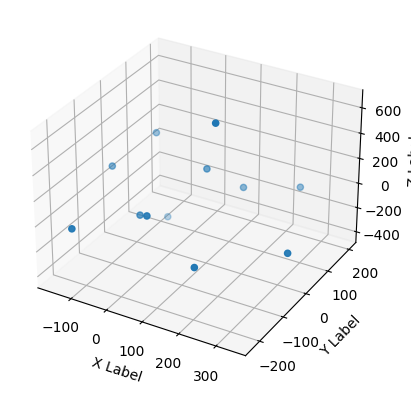

In [13]:
import matplotlib.pyplot as plt

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, and z coordinates from the data
x = projected_p_embd[:, 0]
y = projected_p_embd[:, 1]
z = projected_p_embd[:, 2]

# Plot the points
ax.scatter(x, y, z)

# Set labels for each axis
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()


### 4.2) Via Plotly Express (in progress)

In [10]:
import plotly.express as px

fig = px.scatter_3d(
    projected_p_embd, x=0, y=1, z=2,
    labels={'0': 'label 1', '1': 'label 2', '2': 'label 3'}
)
fig.show()

<span style="color:red"> Error Encounter:</span> <br>
- ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed
- <span style="color:blue"> Solved: </span> pip install --upgrade nbformat
- works only for SPEnv38 (Fabio)

### 4.3) Via Bio-Embeddings Module (in progress)
see [project_visualize_pipeline_embeddings.ipynb](https://github.com/sacdallago/bio_embeddings/tree/develop/notebooks) (Bio-embeddings GitHub)

In [9]:
import h5py
import numpy as np
import pandas as pd
from bio_embeddings.visualize import render_3D_scatter_plotly

column_names = ['component_0', 'component_1', 'component_2']
df = pd.DataFrame(projected_p_embd, columns=column_names)

figure = render_3D_scatter_plotly(df)
figure.show()